In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname, join
path = dirname(dirname(getcwd()))
sys.path.append(path)

In [2]:
from MintPy.interpret_toolkit import InterpretToolkit
from MintPy.utils import (combine_top_features, 
                          save_pickle, 
                          load_pickle)
from MintPy.local_prediction import ExplainLocalPrediction

import plotting_config 
import pandas as pd
import numpy as np
from joblib import load

In [3]:
# Load the model objects. In this case, we are using two popular scikit-learn tree-based methods.
model_filepath = join(getcwd(), 'models')
model_fname = ['RandomForestClassifier.pkl']
model_names = ['Random Forest']
model_objs = [load(join(model_filepath, fname)) for fname in model_fname]

#Import the training dataset
data_filename = join(getcwd(), 'data', 'data_for_mintpy.csv')

# Load the examples the models were trained on.
TARGET_COLUMN = 'cat_rt'
data  = pd.read_csv(data_filename)

examples = data[plotting_config.cols_to_use]
targets = data[TARGET_COLUMN].values

print(f'Examples Shape : {examples.shape}')
print(f'Target Skew : {targets.mean()*100}%')

Examples Shape : (100000, 30)
Target Skew : 39.173%


# Tree Interpreter-Based Feature Contribution (Single Example)

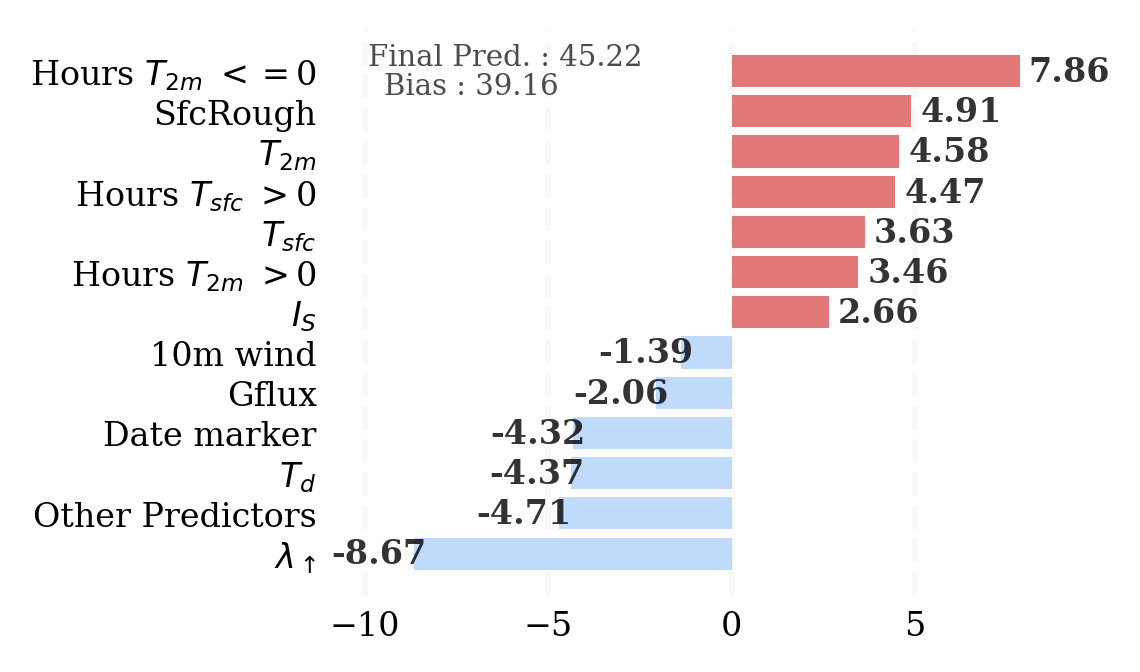

In [4]:
single_example = examples.iloc[[0]]
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=single_example,
                                 targets=targets,
                                )
results = myInterpreter.calc_contributions(method='tree_interpreter', data_for_shap=None, performance_based=False)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )

# Tree Interpreter-Based Feature Contribution (Performance-Based)

In [5]:
"""
del myInterpreter
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=examples,
                                 targets=targets,
                                )
"""

'\ndel myInterpreter\nmyInterpreter = InterpretToolkit(model=model_objs,\n                                 model_names=model_names,\n                                 examples=examples,\n                                 targets=targets,\n                                )\n'

In [6]:
"""
results = myInterpreter.calc_contributions(method='tree_interpreter', data_for_shap=None, performance_based=True)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )
"""

"\nresults = myInterpreter.calc_contributions(method='tree_interpreter', data_for_shap=None, performance_based=True)\nfig = myInterpreter.plot_contributions(to_only_varname=None, \n                              readable_feature_names=plotting_config.readable_feature_names\n                                )\n"

# SHAP-based Feature Contributions (Single Example)

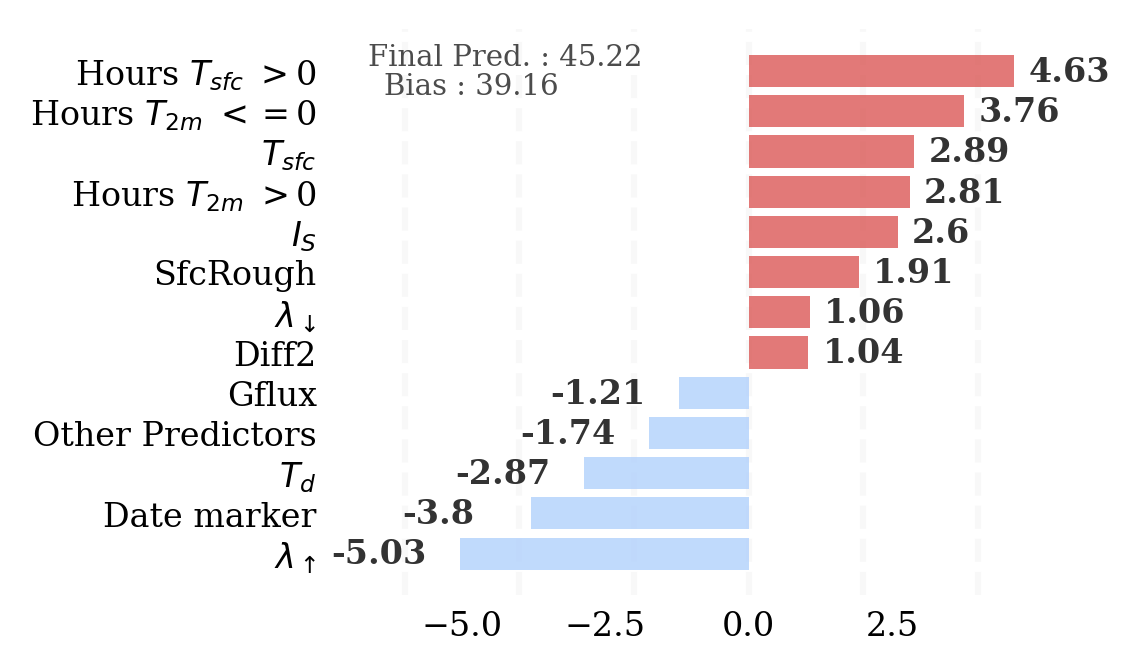

In [7]:
#del myInterpreter
single_example = examples.iloc[[0]]
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=single_example,
                                 targets=targets,
                                )
results = myInterpreter.calc_contributions(method='shap', data_for_shap=examples, performance_based=False, 
                                           shap_sample_size=10000)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )

In [8]:
del myInterpreter
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=examples,
                                 targets=targets,
                                )
results = myInterpreter.calc_contributions(method='shap', data_for_shap=examples, performance_based=True)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )

SHAPError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 1.000000, while the model output was -232035716389609764261849097918391833007217913961051812896252786761776809115648.000000. If this difference is acceptable you can set check_additivity=False to disable this check.